In [43]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")

In [44]:
df = yf.download(["SPY", "GLD"], start="2010-01-01", end="2022-12-31", interval="1wk", progress=False)
df = df["Adj Close"]

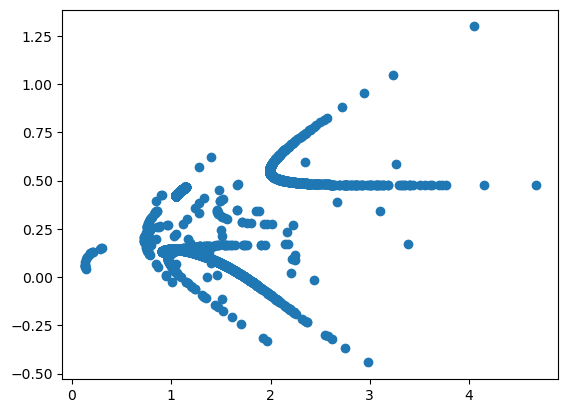

In [46]:
df = yf.download(["SPY", "GLD"], start="2010-01-01", end="2022-12-31", interval="1wk", progress=False)
df = df["Adj Close"]
portfolioDict = {"SPYW":[],"GLDW":[],"portfolioRet":[],"portfolioVol":[]}
#Simulation of 100 portfolios
numPortfolio = 10000
# interval = 1/numPortfolio
for i in range(0,numPortfolio):
  tempDf = pd.DataFrame()
  random_digit = round(random.uniform(0, 1), 3)
  SPYW = i*random_digit
  GLDW = 1-SPYW
  tempDf["GLD"] = df["GLD"] * GLDW
  tempDf["SPY"] = df["SPY"] * SPYW
  tempDf["total_profit"] = tempDf["GLD"] + tempDf["SPY"]
  portfolioDict["SPYW"].append(SPYW)
  portfolioDict["GLDW"].append(GLDW)
  tempDf = np.log1p(tempDf.pct_change().dropna())
  portfolioDict["portfolioRet"].append(np.mean(tempDf["total_profit"]) * 52)
  portfolioDict["portfolioVol"].append(np.std(tempDf["total_profit"]) * np.sqrt(52))

portfolioDf = pd.DataFrame.from_dict(portfolioDict)
# print(portfolioDf.head())
plt.scatter(list(portfolioDf["portfolioVol"]),list(portfolioDf["portfolioRet"]))